# 1. Derivation of the Time-$t$ Value of a Single-Point Knockout Forward Contract  

We derive the time-$t$ value of a single-point knockout forward contract with a non-zero dividend yield $q$ and interest rate $r$. The forward has strike $K$ and maturity $T$. It knocks out if $S(T_1) < H$, where $T_1 < T$.  

## Expected Value of the Forward Payoff  

A standard forward contract with strike $K$ has a payoff at $T$:  

$$
\text{Payoff} = S(T) - K
$$

However, it becomes worthless if $S(T_1) < H$, so the expected value at $T_1$ is:  

$$
F(T_1) = \mathbb{E}_{T_1} [S(T) - K] \mathbf{1}_{S(T_1) \geq H}
$$

Using the expectation relation:  

$$
\mathbb{E}_{T_1} [S(T)] = e^{(r-q)(T-T_1)} S(T_1),
$$

we get:  

$$
F(T_1) = \left( e^{(r-q)(T-T_1)} S(T_1) - K \right) \mathbf{1}_{S(T_1) \geq H}
$$

## Expressing the Knockout Condition Using a Digital Call  

The indicator function can be written using a European digital call option with strike $H$ and expiration $T_1$:  

$$
\mathbf{1}_{S(T_1) \geq H} = \frac{C_{\text{dig}}(S(T_1), H, T_1)}{e^{r(T_1 - t)}}
$$

Thus,  

$$
F(T_1) = \left( e^{(r-q)(T-T_1)} S(T_1) - K \right) \frac{C_{\text{dig}}(S(T_1), H, T_1)}{e^{r(T_1 - t)}}
$$

## Discounting to Time $t$  

Since the forward value is settled at $T$, we discount from $T_1$ back to $t$ using $e^{-r(T_1-t)}$:  

$$
F(t) = e^{-r(T_1-t)} F(T_1)
$$

Substituting $F(T_1)$:  

$$
F(t) = e^{-r(T_1 - t)} \left( e^{(r-q)(T-T_1)} S(T_1) - K \right) \frac{C_{\text{dig}}(S(T_1), H, T_1)}{e^{r(T_1 - t)}}
$$

Simplifying:  

$$
F(t) = \left( e^{(r-q)(T-T_1)} S(T_1) - K \right) C_{\text{dig}}(S(T_1), H, T_1)
$$

## Expressing in Terms of Call Options  

Using the relation:  

$$
S(T_1) C_{\text{dig}}(S(T_1), H, T_1) = C(S(t), H, T_1),
$$

where $C(S(t), H, T_1)$ is a European call with strike $H$ and expiration $T_1$, we rewrite:  

$$
F(t) = e^{(r-q)(T-T_1)} C(S(t), H, T_1) - K C_{\text{dig}}(S(t), H, T_1)
$$

## Final Result  

$$
F(t) = e^{(r-q)(T-T_1)} C(S(t), H, T_1) - K C_{\text{dig}}(S(t), H, T_1)
$$

This expresses the value of the knockout forward contract in terms of a European call and a digital call, both with strike $H$ and expiration $T_1$.


# 2.

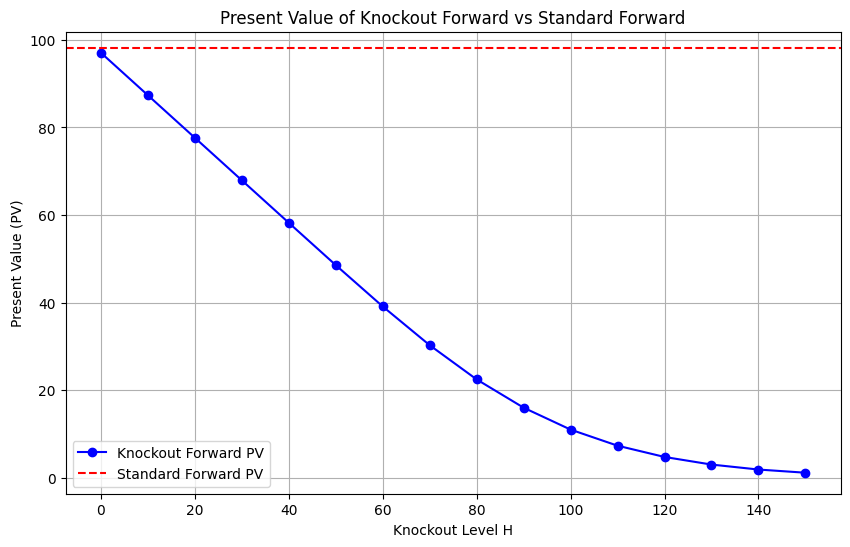

The PV of the standard forward is 98.02.
As the knockout level increases, the PV of the knockout forward decreases.
This is because the knockout option limits the upside potential of the forward contract.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qflib as qf

# Parameters
S = 100  # Spot price
K = 100  # Strike price
T = 1  # Time to expiration
T1 = 1/2  # Time to knockout
q = 0.02  # Dividend yield
r = 0.04  # Interest rate 
sigma = 0.4  # Volatility 

# Define the range of knockout levels
H_values = np.arange(0, 151, 10)

# Calculate the PV of the knockout forward contract for each knockout level
koFwd_pv = []
for H in H_values:
    koFwd_pv.append(qf.koFwd(S, K, H, T, T1, r, q, sigma))

# Calculate the PV of the standard forward contract
standard_forward_pv = qf.fwdPrice(S, T, r, q) * np.exp(-r * T)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(H_values, koFwd_pv, label='Knockout Forward PV', color='blue', marker='o')
plt.axhline(y=standard_forward_pv, color='red', linestyle='--', label='Standard Forward PV')
plt.title('Present Value of Knockout Forward vs Standard Forward')
plt.xlabel('Knockout Level H')
plt.ylabel('Present Value (PV)')
plt.legend()
plt.grid(True)
plt.show()

# Comment on the plot
print(f"The PV of the standard forward is {standard_forward_pv:.2f}.")
print(f"As the knockout level increases, the PV of the knockout forward decreases.")
print("This is because the knockout option limits the upside potential of the forward contract.")


# 3.

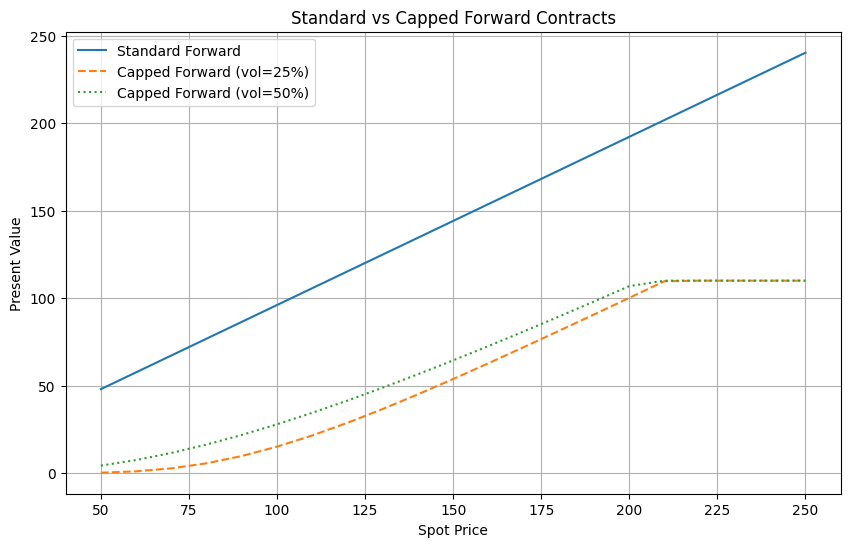

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import qflib as qf

# parameters
T = 2
K1 = 100
K2 = 110  
r = 0.04
q = 0.02
vol_low = 0.25  
vol_high = 0.50

# Spot prices from 50 to 250 in steps of 10
spot_prices = np.arange(50, 260, 10)

# Function to price standard forward contract using qf.fwdPrice
def standard_forward(spot, T, r, q):
    return qf.fwdPrice(spot, T, r, q) * np.exp(-r * T)

# Function to price capped forward contract using qf.euroBS
def capped_forward(spot, T, K1, K2, r, q, vol):
    return np.minimum(K2, qf.euroBS(1, spot, K1, T, r, q, vol))

# Compute values
standard_fwd_values = [standard_forward(s, T, r, q) for s in spot_prices]
capped_fwd_values_low = [capped_forward(s, T, K1, K2, r, q, vol_low) for s in spot_prices]
capped_fwd_values_high = [capped_forward(s, T, K1, K2, r, q, vol_high) for s in spot_prices]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, standard_fwd_values, label='Standard Forward')
plt.plot(spot_prices, capped_fwd_values_low, label='Capped Forward (vol=25%)', linestyle='dashed')
plt.plot(spot_prices, capped_fwd_values_high, label='Capped Forward (vol=50%)', linestyle='dotted')
plt.xlabel('Spot Price')
plt.ylabel('Present Value')
plt.title('Standard vs Capped Forward Contracts')
plt.legend()
plt.grid()
plt.show()


### Effect of Volatility on the Capped Forward Value

The value of a capped forward contract **increases as volatility increases**. 

- **Capped Forward as a Call Option:** A capped forward is similar to a call option, where the payoff is $\min(S_T - K_1, K_2)$. As volatility rises, the range of possible spot prices $S_T$ widens, increasing the likelihood of hitting the cap $K_2$.
  
- **Volatility and Option Value:** Higher volatility raises the probability of a higher payoff (closer to $K_2$) and, therefore, increases the present value of the capped forward. This mirrors the behavior of options, where greater volatility leads to higher potential value.